# Machine Learning Project - Part B - Decision Tree - Q1 & Hyper Parameters

In [1]:
# IMPORT

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inLine

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.utils import class_weight
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# https://www.python-graph-gallery.com/

# Read File - X_test

In [11]:
directory = r"C:\Users\RoiAz\Machine Learning Project\Part B\X_test_F.xlsx"
X_test = pd.read_excel(directory)
X_test = pd.DataFrame(X_test)
X_test

,gender,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,AST,ALT,Gtp,dental caries,tartar,BMI,Blood_Pressure
0,0,60,150,55,103.0,63.0,100.0,242.0,101.0,51.0,170.0,13.3,22.0,16.0,20.0,0,0,24.444444,Optimal
1,0,50,145,55,127.0,75.0,100.0,242.0,89.0,66.0,158.0,15.1,18.0,15.0,17.0,0,1,26.159334,Normal
2,0,60,155,65,110.0,70.0,88.0,214.0,124.0,60.0,129.0,14.1,17.0,15.0,22.0,0,0,27.055151,Optimal
3,1,55,180,85,108.0,74.0,119.0,110.0,155.0,37.0,42.0,13.8,21.0,24.0,35.0,0,0,26.234568,Optimal
4,0,60,150,55,143.0,77.0,101.0,176.0,156.0,58.0,89.0,13.5,42.0,22.0,28.0,0,1,24.444444,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,1,40,175,95,130.0,86.0,92.0,204.0,236.0,36.0,121.0,17.4,25.0,34.0,28.0,0,1,31.020408,Normal High
11135,0,45,155,50,145.0,100.0,99.0,254.0,102.0,80.0,154.0,13.9,19.0,11.0,17.0,0,1,20.811655,High
11136,0,45,165,60,117.0,79.0,87.0,182.0,29.0,60.0,116.0,11.2,28.0,16.0,12.0,0,0,22.038567,Optimal
11137,0,50,150,55,118.0,78.0,93.0,165.0,88.0,51.0,96.0,11.8,19.0,12.0,17.0,0,1,24.444444,Optimal


# Read File - Xy_train

In [12]:
directory = r"C:\Users\RoiAz\Machine Learning Project\Part B\Xy_train_F.xlsx"
df = pd.read_excel(directory)
df = pd.DataFrame(df)
df

,gender,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,AST,ALT,Gtp,dental caries,tartar,BMI,Blood_Pressure,smoking
0,1,45,170,65,140.0,100.0,96.0,222.0,212.0,40.0,140.0,15.4,41.0,68.0,34.0,0,1,22.491349,High,0
1,1,50,170,75,138.0,88.0,92.0,257.0,285.0,52.0,148.0,15.2,38.0,45.0,67.0,0,1,25.951557,Normal High,1
2,1,70,160,70,143.0,76.0,128.0,174.0,120.0,51.0,99.0,15.8,22.0,24.0,43.0,0,1,27.343750,High,1
3,1,35,180,90,120.0,78.0,94.0,213.0,264.0,52.0,108.0,16.1,16.0,31.0,89.0,0,0,27.777778,Normal,1
4,0,50,150,60,128.0,81.0,106.0,180.0,94.0,78.0,91.0,14.0,23.0,19.0,16.0,0,0,26.666667,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,1,40,160,60,151.0,102.0,100.0,206.0,97.0,64.0,122.0,14.0,20.0,17.0,15.0,0,0,23.437500,High,1
44549,1,35,180,75,132.0,86.0,95.0,203.0,209.0,42.0,119.0,15.9,19.0,21.0,18.0,0,1,23.148148,Normal High,0
44550,1,20,175,60,99.0,50.0,91.0,162.0,64.0,54.0,95.0,15.6,18.0,13.0,18.0,1,1,19.591837,Optimal,1
44551,1,45,160,65,153.0,98.0,99.0,280.0,336.0,53.0,160.0,15.9,37.0,48.0,96.0,1,1,25.390625,High,1


In [13]:
X_train = df.drop('smoking', 1)
y_train = df['smoking']
X_train

,gender,age,height(cm),weight(kg),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,AST,ALT,Gtp,dental caries,tartar,BMI,Blood_Pressure
0,1,45,170,65,140.0,100.0,96.0,222.0,212.0,40.0,140.0,15.4,41.0,68.0,34.0,0,1,22.491349,High
1,1,50,170,75,138.0,88.0,92.0,257.0,285.0,52.0,148.0,15.2,38.0,45.0,67.0,0,1,25.951557,Normal High
2,1,70,160,70,143.0,76.0,128.0,174.0,120.0,51.0,99.0,15.8,22.0,24.0,43.0,0,1,27.343750,High
3,1,35,180,90,120.0,78.0,94.0,213.0,264.0,52.0,108.0,16.1,16.0,31.0,89.0,0,0,27.777778,Normal
4,0,50,150,60,128.0,81.0,106.0,180.0,94.0,78.0,91.0,14.0,23.0,19.0,16.0,0,0,26.666667,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,1,40,160,60,151.0,102.0,100.0,206.0,97.0,64.0,122.0,14.0,20.0,17.0,15.0,0,0,23.437500,High
44549,1,35,180,75,132.0,86.0,95.0,203.0,209.0,42.0,119.0,15.9,19.0,21.0,18.0,0,1,23.148148,Normal High
44550,1,20,175,60,99.0,50.0,91.0,162.0,64.0,54.0,95.0,15.6,18.0,13.0,18.0,1,1,19.591837,Optimal
44551,1,45,160,65,153.0,98.0,99.0,280.0,336.0,53.0,160.0,15.9,37.0,48.0,96.0,1,1,25.390625,High


### Convert "Blood Pressure" into Dummy 

In [16]:
X_train = pd.get_dummies(X_train, columns=['Blood_Pressure'])

# Train - Validation split:

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=123)

In [18]:
model = DecisionTreeClassifier(criterion='entropy', random_state = 42)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [22]:
print(f"Accuracy on Train: {accuracy_score(y_true=y_train, y_pred=model.predict(x_train))*100:.2f}%")
print(f"Accuracy on Test: {accuracy_score(y_true=y_test, y_pred=model.predict(x_test))*100:.2f}%")

Accuracy on Train: 100.00%
Accuracy on Test: 76.89%


# Tune: Max Depth

In [23]:
max_depth_list = np.arange(1, 51, 1)
print(max_depth_list)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [24]:
resMaxDepth = pd.DataFrame()
for max_depth in max_depth_list:
    model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=123)
    model.fit(x_train, y_train)
    resMaxDepth = resMaxDepth.append({'Max_Depth': max_depth,
                      'Train_Accuracy': accuracy_score(y_train, model.predict(x_train)),
                      'Test_Accuracy': accuracy_score(y_test, model.predict(x_test))}, ignore_index=True)

In [25]:
res_SortedV = resMaxDepth.copy().sort_values('Test_Accuracy', ascending=False, ignore_index= True)
res_SortedV

,Max_Depth,Train_Accuracy,Test_Accuracy
0,30.0,0.999383,0.770957
1,50.0,1.000000,0.769162
2,40.0,1.000000,0.769162
3,32.0,1.000000,0.769162
4,33.0,1.000000,0.769162
5,34.0,1.000000,0.769162
6,35.0,1.000000,0.769162
7,36.0,1.000000,0.769162
8,37.0,1.000000,0.769162
9,38.0,1.000000,0.769162


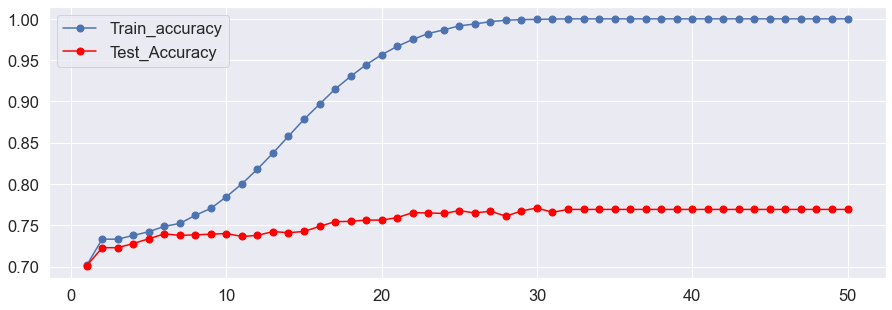

Best value (Max Depth):  30.0
Test (Validation) accuracy:  77.1 %


In [15]:
best_max_depth = res_SortedV.loc[res_SortedV['Test_Accuracy'].idxmax(), 'Max_Depth']
best_max_depth_Acc = res_SortedV.loc[res_SortedV['Test_Accuracy'].idxmax(), 'Test_Accuracy']

plt.figure(figsize=(15, 5))
sns.set(font_scale=1.5)
plt.plot(resMaxDepth['Max_Depth'], resMaxDepth['Train_Accuracy'], marker='o', markersize=7)
plt.plot(resMaxDepth['Max_Depth'], resMaxDepth['Test_Accuracy'], marker='o', markersize=7, color="red")
plt.legend(['Train_accuracy', 'Test_Accuracy'])
plt.show()

print("Best value (Max Depth): ", best_max_depth)
print("Test (Validation) accuracy: ", round(best_max_depth_Acc*100, 2), "%")

# Tune: Max Features

In [16]:
max_features_list = np.arange(1, 20, 1)  # We Have 19 Features.
print(max_features_list)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [17]:
resMaxFeatures = pd.DataFrame()
for max_features in max_features_list:
    model = DecisionTreeClassifier(criterion='entropy', max_features=max_features, random_state=123)
    model.fit(x_train, y_train)
    resMaxFeatures = resMaxFeatures.append({'Max_Features': max_features,
                      'Train_Accuracy': accuracy_score(y_train, model.predict(x_train)),
                      'Test_Accuracy': accuracy_score(y_test, model.predict(x_test))}, ignore_index=True)

In [18]:
res_SortedV2 = resMaxFeatures.copy().sort_values('Test_Accuracy', ascending=False, ignore_index= True)
res_SortedV2

,Max_Features,Train_Accuracy,Test_Accuracy
0,7.0,1.0,0.778925
1,6.0,1.0,0.776119
2,14.0,1.0,0.773875
3,18.0,1.0,0.771406
4,13.0,1.0,0.770396
5,4.0,1.0,0.770396
6,10.0,1.0,0.769498
7,19.0,1.0,0.769498
8,16.0,1.0,0.769274
9,15.0,1.0,0.768488


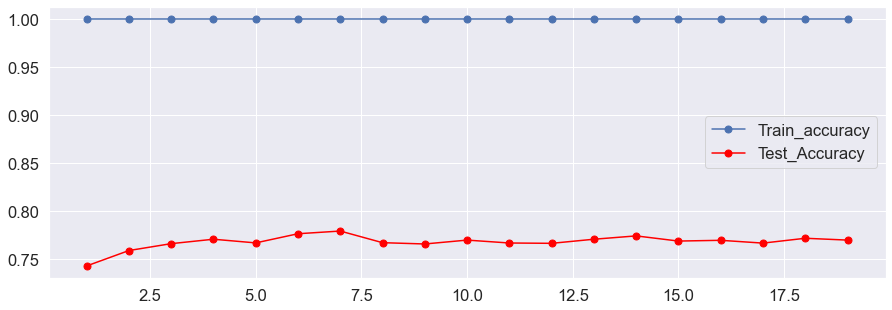

Best value (Max Features):  7.0
Test (Validation) accuracy:  77.89 %


In [19]:
plt.figure(figsize=(15, 5))
sns.set(font_scale=1.5)
plt.plot(resMaxFeatures['Max_Features'], resMaxFeatures['Train_Accuracy'], marker='o', markersize=7)
plt.plot(resMaxFeatures['Max_Features'], resMaxFeatures['Test_Accuracy'], marker='o', markersize=7, color="red")
plt.legend(['Train_accuracy', 'Test_Accuracy'])
plt.show()

best_Max_Features = res_SortedV2.loc[res_SortedV2['Test_Accuracy'].idxmax(), 'Max_Features']
best_Max_Features_Acc = res_SortedV2.loc[res_SortedV2['Test_Accuracy'].idxmax(), 'Test_Accuracy']
print("Best value (Max Features): ", best_Max_Features)
print("Test (Validation) accuracy: ", round(best_Max_Features_Acc*100, 2), "%")


# Tune: Min Samples Leaf

In [20]:
min_samples_leaf_list = np.arange(1, 11, 1)  # Check to 10 Samples.
print(min_samples_leaf_list)

[ 1  2  3  4  5  6  7  8  9 10]


In [21]:
resMinSamplesLeaf = pd.DataFrame()
for min_samples_leaf in min_samples_leaf_list:
    model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=123)
    model.fit(x_train, y_train)
    resMinSamplesLeaf = resMinSamplesLeaf.append({'Min_Samples_Leaf': min_samples_leaf,
                      'Train_Accuracy': accuracy_score(y_train, model.predict(x_train)),
                      'Test_Accuracy': accuracy_score(y_test, model.predict(x_test))}, ignore_index=True)

In [22]:
res_SortedV3 = resMinSamplesLeaf.copy().sort_values('Test_Accuracy', ascending=False, ignore_index= True)
res_SortedV3

,Min_Samples_Leaf,Train_Accuracy,Test_Accuracy
0,1.0,1.000000,0.769162
1,2.0,0.976488,0.755359
2,3.0,0.961169,0.754573
3,4.0,0.940800,0.749635
4,5.0,0.925088,0.749411
5,7.0,0.896442,0.744473
6,6.0,0.909517,0.744136
7,9.0,0.877588,0.741106
8,8.0,0.886566,0.740658
9,10.0,0.867768,0.737740


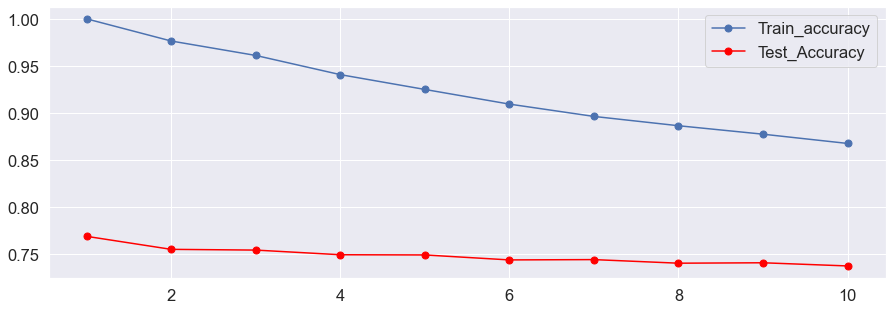

Best value (Min Samples Leaf):  1.0
Test (Validation) accuracy:  76.92 %


In [23]:
plt.figure(figsize=(15, 5))
sns.set(font_scale=1.5)
plt.plot(resMinSamplesLeaf['Min_Samples_Leaf'], resMinSamplesLeaf['Train_Accuracy'], marker='o', markersize=7)
plt.plot(resMinSamplesLeaf['Min_Samples_Leaf'], resMinSamplesLeaf['Test_Accuracy'], marker='o', markersize=7, color="red")
plt.legend(['Train_accuracy', 'Test_Accuracy'])
plt.show()

best_Min_Samples_Leaf = res_SortedV3.loc[res_SortedV3['Test_Accuracy'].idxmax(), 'Min_Samples_Leaf']
best_Min_Samples_Leaf_Acc = res_SortedV3.loc[res_SortedV3['Test_Accuracy'].idxmax(), 'Test_Accuracy']
print("Best value (Min Samples Leaf): ", best_Min_Samples_Leaf)
print("Test (Validation) accuracy: ", round(best_Min_Samples_Leaf_Acc*100, 2), "%")